In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('seaborn-bright')
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
%matplotlib inline 

/home/dans/.local/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
ratings_df = pd.read_csv('/home/dans/Downloads/pyp/archive/ratings.csv', low_memory=False)
#ratings_data = ratings_df.drop('timestamp', axis = 1)


In [3]:
#ratings_df = ratings_df.drop('timestamp', axis=1)

In [4]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [5]:
movies_names = pd.read_csv('/home/dans/Downloads/pyp/archive/movies_md.csv', low_memory=False)

movies_names = movies_names[['title', 'genres','id']]

movies_names

,title,genres,id
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",11862
...,...,...,...
45461,Subdue,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050
45462,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",111109
45463,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758
45464,Satan Triumphant,[],227506


In [6]:
movies_names.rename(columns={'id':'movieId'}, inplace=True)

movies_names.head()

,title,genres,movieId
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",11862


In [7]:
#movies_data = pd.concat([ratings_df, movies_names], axis=1)
movies_names['movieId'] = movies_names['movieId'].astype('string')
ratings_df['movieId'] = ratings_df['movieId'].astype('string')




In [10]:
moviesD = pd.merge(movies_names, ratings_df, on="movieId", how='inner')

In [15]:
moviesD

,title,genres,movieId,userId,rating,timestamp
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,1923,3.0,858335006
1,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,2103,5.0,946044912
2,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,5380,1.0,878941641
3,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,6177,4.0,859415226
4,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,6525,4.0,857388995
...,...,...,...,...,...,...
11437632,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",111109,33940,2.5,1405878785
11437633,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",111109,172224,3.0,1399502972
11437634,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",111109,210792,3.0,1467090449
11437635,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",111109,225396,3.5,1399302912


In [19]:
trend = pd.DataFrame(moviesD.groupby('title')['rating'].mean())

trend['total number of ratings'] = pd.DataFrame(moviesD.groupby('title')['rating'].count()) 



,rating,total number of ratings
title,,
!Women Art Revolution,2.802945,883
"$1,000 on the Black",3.000000,1
$5 a Day,2.246795,156
'Gator Bait,3.443590,195
'R Xmas,2.627907,86


In [22]:
trend

,rating,total number of ratings
title,,
!Women Art Revolution,2.802945,883
"$1,000 on the Black",3.000000,1
$5 a Day,2.246795,156
'Gator Bait,3.443590,195
'R Xmas,2.627907,86
...,...,...
Ödipussi,3.458498,253
Şaban Oğlu Şaban,3.764228,123
Škola princů,3.750000,2


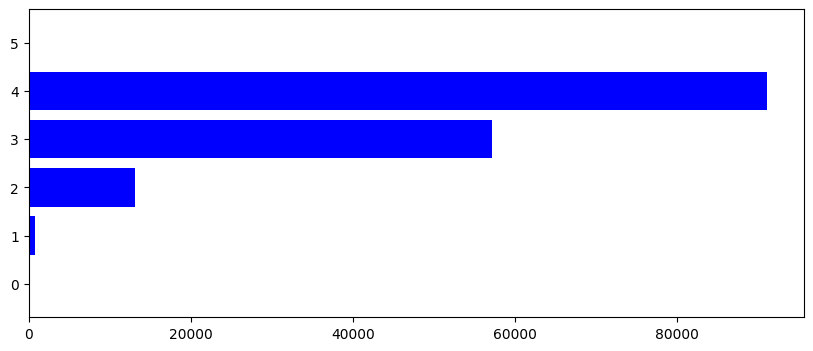

In [24]:
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'],color='b')
plt.show()

In [26]:
moviesD.groupby('title')['rating'].mean().sort_values(ascending=False).tail(10)

title
Hush                      0.5
Raghu Romeo               0.5
The Crush                 0.5
Funeral March             0.5
Western Spaghetti         0.5
Lola and Billy the Kid    0.5
Zero Charisma             0.5
Point of Order!           0.5
Two in One                0.5
Guilty Hands              0.5
Name: rating, dtype: float64

In [28]:
movies_users = ratings_df.pivot(index=['userId'], columns=['movieId'], values='rating').fillna(0)
movies_users

/tmp/ipykernel_3885/1020245716.py:1: PerformanceWarning: The following operation may generate 12221473040 cells in the resulting pandas object.
  movies_users = ratings_df.pivot(index=['userId'], columns=['movieId'], values='rating').fillna(0)


MemoryError: Unable to allocate 11.4 GiB for an array with shape (12221473040,) and data type bool